# ABInBev Coding Challenge - Data Science Placement

The Demand Planning Team for Europe BU Central has approached us and asked us for help in analyzing order data and help to build their forecast.

They have provided data on order volume and master data going back to 2018 for us to analyze!

They first want us to conduct an exploratory analysis (since they haven't looked at the data yet) and potentially they will want us to help build their demand forecast.

Your Senior Data Scientist has given you a series of tasks to complete

Your Senior Data Scientist has a couple of guidelines for you to code by which you will be assessed:

* If you import any module, specify for what it is going to be used
* Do not change the original data sources, perform all the operations on this Jupyter Notebook
* If you take assumptions during your analysis, be sure to specify them
* Be sure to comment your code so it can be easily read
* Make sure there are no errors in the code after handing it in

Also a couple of points to consider:

* If there are any limitations with the data or any task you deem not feasible, contact your Senior Data Scientist or specify the limitations in the notebook 
* Modular code will be appreciated, however you are not required to build your own classes

You can reach out to your Senior Data Scientist with questions, however you are free to specify your own assumptions

## Mission 1 (1pt)

The demand planning team has asked you to give more visibility on ordering frequency by week by SKU (Stock Keeping Unit, or beer code). 

However, they would also like to have in the report the Brand, Container Type and the Container Size of the beer, so its easier for them to read.

Using the data provided, build a report on the top 10 SKUs, Brands and Containers ordered. The Demand planning team has asked for:

* Tables with the total ordering frequency by week
* Bar Charts to be easier to show other stakeholders

You can include any other information you think will be relevant to the demand planning team

In [218]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import seaborn as sns

from pandas_profiling import ProfileReport
from ipywidgets import widgets




In [71]:
df = pd.read_csv('beer_order_data.csv')
df2 = pd.read_excel('master_data_skus.xlsx')
df3 = pd.read_excel('country_codes.xlsx')

df2.rename(columns = {'Article #':'SKU'}, inplace = True)
type(df)

pandas.core.frame.DataFrame

In [132]:
merged_data = df.merge(df2,on=["SKU"])
merged_data = df.merge(df2,on=["SKU"])
merged_data.head()

Unnamed: 0_x  Week Number  Year        SKU Country        Customer Name  \
0             0           14  2018  999003585      UK                Tesco   
1             1           14  2018  999003585      UK                 Aldi   
2             2           14  2018  999003585      UK             Morrison   
3             3           14  2018  999003585      UK  Waitrose & Partners   
4             4           14  2018  999003585      UK          Sainsbury's   

   Order Volume - Pallets  Unnamed: 0_y      Brand Container Type  \
0                      36        113693  LOWENBRAU            Can   
1                       2        113693  LOWENBRAU            Can   
2                      24        113693  LOWENBRAU            Can   
3                       0        113693  LOWENBRAU            Can   
4                       0        113693  LOWENBRAU            Can   

   Container Size (L)  
0                0.33  
1                0.33  
2                0.33  
3                0.33  
4                0.33

In [133]:
merged_data.rename(columns = {'Order Volume - Pallets':'Order_Volume_Pallets','Week Number':'Week_Number','Customer Name':'Customer_Name'}, inplace = True)
merged_data

Unnamed: 0_x  Week_Number  Year        SKU Country  \
0                  0           14  2018  999003585      UK   
1                  1           14  2018  999003585      UK   
2                  2           14  2018  999003585      UK   
3                  3           14  2018  999003585      UK   
4                  4           14  2018  999003585      UK   
...              ...          ...   ...        ...     ...   
246670        246670           52  2020      43521      BE   
246671        246671           52  2020      43521      BE   
246672        246672           52  2020      43521      NL   
246673        246673           52  2020      43521      NL   
246674        246674           52  2020      43521      NL   

              Customer_Name  Order_Volume_Pallets  Unnamed: 0_y      Brand  \
0                     Tesco                    36        113693  LOWENBRAU   
1                      Aldi                     2        113693  LOWENBRAU   
2                  Morrison                    24        113693  LOWENBRAU   
3       Waitrose & Partners                     0        113693  LOWENBRAU   
4               Sainsbury's                     0        113693  LOWENBRAU   
...                     ...                   ...           ...        ...   
246670                Jumbo                    19         22937     SPATEN   
246671         Albert Heijn                    14         22937     SPATEN   
246672                Jumbo                     5         22937     SPATEN   
246673         Albert Heijn                     7         22937     SPATEN   
246674                 Aldi                     2         22937     SPATEN   

       Container Type  Container Size (L)  
0                 Can                0.33  
1                 Can                0.33  
2                 Can                0.33  
3                 Can                0.33  
4                 Can                0.33  
...               ...                 ...  
246670            Can                0.50  
246671            Can                0.50  
246672            Can                0.50  
246673            Can                0.50  
246674            Can                0.50  

[246675 rows x 11 columns]

# Basic Info about dataset 

In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246675 entries, 0 to 246674
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0_x          246675 non-null  int64  
 1   Week_Number           246675 non-null  int64  
 2   Year                  246675 non-null  int64  
 3   SKU                   246675 non-null  int64  
 4   Country               246675 non-null  object 
 5   Customer Name         246675 non-null  object 
 6   Order_Volume_Pallets  246675 non-null  int64  
 7   Unnamed: 0_y          246675 non-null  int64  
 8   Brand                 246675 non-null  object 
 9   Container Type        246675 non-null  object 
 10  Container Size (L)    243386 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 22.6+ MB


In [5]:
merged_data['Order_Volume_Pallets'].describe()

count    246675.000000
mean         14.498810
std          22.552534
min           0.000000
25%           2.000000
50%           7.000000
75%          18.000000
max         346.000000
Name: Order_Volume_Pallets, dtype: float64

In [6]:
profile = ProfileReport(merged_data,title='report')
#profile.to_widgets()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
top = merged_data.groupby(['SKU','Container Type','Brand'],as_index = False)['Order_Volume_Pallets'].sum()
top = top.sort_values(by=['Order_Volume_Pallets'],ascending=False)

top1 = top['SKU'][:10].values.tolist()
top1 #list with the top 10 SKUS



[19899, 30548, 86798, 64813, 30426, 29924, 40319, 54203, 5681, 31584]

In [117]:
top_index = [index for index in range(len(merged_data))
            if merged_data['SKU'][index] in top1]
len(top_index) #index in merged_data where we can find the top SKUS
#top_index

32890

In [7]:
merged_data1 = merged_data[merged_data.index.isin(top_index)]
len(merged_data1) #df with only top 10 SKUS

32890

In [8]:
sum1 = merged_data1.groupby(['Year','Week_Number','SKU'])['Order_Volume_Pallets'].sum()
sum1


Year  Week_Number  SKU  
2018  14           5681     379
                   19899    351
                   29924    415
                   30426    450
                   30548    403
                           ... 
2020  52           31584    474
                   40319    344
                   54203    477
                   64813    458
                   86798    317
Name: Order_Volume_Pallets, Length: 1430, dtype: int64

In [120]:
sum2 = sum1.to_frame(name='Order_Volume_Pallets')
sum2.reset_index(drop=False, inplace=True)  # As needed                       
sum2

Year  Week_Number    SKU  Order_Volume_Pallets
0     2018           14   5681                   379
1     2018           14  19899                   351
2     2018           14  29924                   415
3     2018           14  30426                   450
4     2018           14  30548                   403
...    ...          ...    ...                   ...
1425  2020           52  31584                   474
1426  2020           52  40319                   344
1427  2020           52  54203                   477
1428  2020           52  64813                   458
1429  2020           52  86798                   317

[1430 rows x 4 columns]

# Tables with the total ordering frequency by week (by year)

<AxesSubplot:xlabel='Week_Number'>

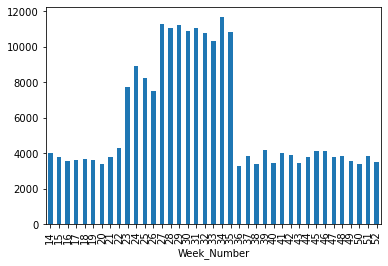

In [128]:
sum18 = sum2.loc[sum2['Year'] == 2018]
sum18 = sum18.groupby(['Week_Number']).sum('Order_Volume_Pallets')
#sum18
sum18['Order_Volume_Pallets'].plot.bar(stacked=True)

<AxesSubplot:xlabel='Week_Number'>

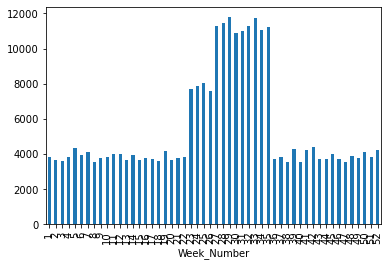

In [127]:
sum19 = sum2.loc[sum2['Year'] == 2019]
sum19 = sum19.groupby(['Week_Number']).sum('Order_Volume_Pallets')
#sum19
sum19['Order_Volume_Pallets'].plot.bar(stacked=True)

<AxesSubplot:xlabel='Week_Number'>

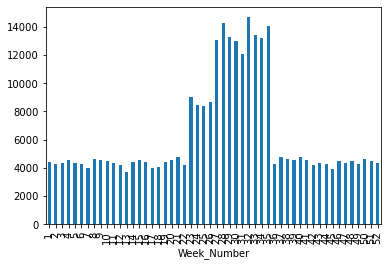

In [126]:
sum20 = sum2.loc[sum2['Year'] == 2020]
sum20 = sum20.groupby(['Week_Number']).sum('Order_Volume_Pallets')
#sum20
sum20['Order_Volume_Pallets'].plot.bar(stacked=True)

## Mission 2 (1pt)

The demand planning team would be keen to analyze monthly data to analyze seasonality patterns, but unfortunately they don't have a dataset with the month specified.

They have asked us if we could include the month in the dataset above using the company standard.

Using the ISO-8601 Week-Based calendar (4-4-5 method), include the Month in the order frequency data.

e.g. January - 4 weeks / February - 4 weeks / March - 5 weeks, etc.

In [20]:
import math

In [21]:
merged_data["month"] = " "
merged_data

Unnamed: 0_x  Week_Number  Year        SKU Country  \
0                  0           14  2018  999003585      UK   
1                  1           14  2018  999003585      UK   
2                  2           14  2018  999003585      UK   
3                  3           14  2018  999003585      UK   
4                  4           14  2018  999003585      UK   
...              ...          ...   ...        ...     ...   
246670        246670           52  2020      43521      BE   
246671        246671           52  2020      43521      BE   
246672        246672           52  2020      43521      NL   
246673        246673           52  2020      43521      NL   
246674        246674           52  2020      43521      NL   

              Customer_Name  Order_Volume_Pallets  Unnamed: 0_y      Brand  \
0                     Tesco                    36        113693  LOWENBRAU   
1                      Aldi                     2        113693  LOWENBRAU   
2                  Morrison                    24        113693  LOWENBRAU   
3       Waitrose & Partners                     0        113693  LOWENBRAU   
4               Sainsbury's                     0        113693  LOWENBRAU   
...                     ...                   ...           ...        ...   
246670                Jumbo                    19         22937     SPATEN   
246671         Albert Heijn                    14         22937     SPATEN   
246672                Jumbo                     5         22937     SPATEN   
246673         Albert Heijn                     7         22937     SPATEN   
246674                 Aldi                     2         22937     SPATEN   

       Container Type  Container Size (L) month  
0                 Can                0.33        
1                 Can                0.33        
2                 Can                0.33        
3                 Can                0.33        
4                 Can                0.33        
...               ...                 ...   ...  
246670            Can                0.50        
246671            Can                0.50        
246672            Can                0.50        
246673            Can                0.50        
246674            Can                0.50        

[246675 rows x 12 columns]

In [152]:
def add_month1(df):
    for i in range(len(merged_data)):
        if (merged_data['Week_Number'][i] in range (1,5)):
         merged_data['month'][i] = 'January'
        if (merged_data['Week_Number'][i] in range (5,9)):
         merged_data['month'][i] = 'February'
        if (merged_data['Week_Number'][i] in range (9,14)):
         merged_data['month'][i] = 'March'
        if (merged_data['Week_Number'][i] in range (14,18)):
         merged_data['month'][i] = 'April'
        if (merged_data['Week_Number'][i] in range (18,22)):
         merged_data['month'][i] = 'May'
        if (merged_data['Week_Number'][i] in range (22,27)):
         merged_data['month'][i] = 'June'
        if (merged_data['Week_Number'][i] in range (27,31)):
         merged_data['month'][i] = 'July'
        if (merged_data['Week_Number'][i] in range (31,35)):
         merged_data['month'][i] = 'August'
        if (merged_data['Week_Number'][i] in range (35,40)):
         merged_data['month'][i] = 'September'
        if (merged_data['Week_Number'][i] in range (40,44)):
         merged_data['month'][i] = 'Octomber'
        if (merged_data['Week_Number'][i] in range (44,48)):
         merged_data['month'][i] = 'November'
        if (merged_data['Week_Number'][i] in range (48,53)):
         merged_data['month'][i] = 'December'
    print(df)
    
add_month1(merged_data)

D:\ancda\envs\neural_networks\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\ancda\envs\neural_networks\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\ancda\envs\neural_networks\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\a

        Unnamed: 0_x  Week_Number  Year        SKU Country  \
0                  0           14  2018  999003585      UK   
1                  1           14  2018  999003585      UK   
2                  2           14  2018  999003585      UK   
3                  3           14  2018  999003585      UK   
4                  4           14  2018  999003585      UK   
...              ...          ...   ...        ...     ...   
246670        246670           52  2020      43521      BE   
246671        246671           52  2020      43521      BE   
246672        246672           52  2020      43521      NL   
246673        246673           52  2020      43521      NL   
246674        246674           52  2020      43521      NL   

              Customer Name  Order_Volume_Pallets  Unnamed: 0_y      Brand  \
0                     Tesco                    36        113693  LOWENBRAU   
1                      Aldi                     2        113693  LOWENBRAU   
2                  Mo

In [22]:
def add_month(df):
  week_count=0
  count=0
  temp=df['Week_Number'][0]
  months_list=[]
  months=['January','February','March','April','May','June','July','August','September','October','Novenmber','December',]
  month_count=3
  for i in range(len(df)):
    if temp!=df['Week_Number'][i]: #temp!=14
      if temp>df['Week_Number'][i]:
        week_jump=52 - temp +df['Week_Number'][i]
        week_count=week_count + week_jump
      else:
        week_jump=(df['Week_Number'][i]-temp)
        week_count=week_count + week_jump
      temp=df['Week_Number'][i]
    if(week_count>3 and count==2):
     week_count=week_count-1
     count=-1
    if week_count>3:
      month_count= month_count + math.ceil(week_jump/4)
      count=count + 1
      week_count=week_count-4
    months_list.append(months[month_count%12])
    
  df["month"] = months_list
    

In [23]:
add_month(merged_data)

In [24]:
merged_data

Unnamed: 0_x  Week_Number  Year        SKU Country  \
0                  0           14  2018  999003585      UK   
1                  1           14  2018  999003585      UK   
2                  2           14  2018  999003585      UK   
3                  3           14  2018  999003585      UK   
4                  4           14  2018  999003585      UK   
...              ...          ...   ...        ...     ...   
246670        246670           52  2020      43521      BE   
246671        246671           52  2020      43521      BE   
246672        246672           52  2020      43521      NL   
246673        246673           52  2020      43521      NL   
246674        246674           52  2020      43521      NL   

              Customer_Name  Order_Volume_Pallets  Unnamed: 0_y      Brand  \
0                     Tesco                    36        113693  LOWENBRAU   
1                      Aldi                     2        113693  LOWENBRAU   
2                  Morrison                    24        113693  LOWENBRAU   
3       Waitrose & Partners                     0        113693  LOWENBRAU   
4               Sainsbury's                     0        113693  LOWENBRAU   
...                     ...                   ...           ...        ...   
246670                Jumbo                    19         22937     SPATEN   
246671         Albert Heijn                    14         22937     SPATEN   
246672                Jumbo                     5         22937     SPATEN   
246673         Albert Heijn                     7         22937     SPATEN   
246674                 Aldi                     2         22937     SPATEN   

       Container Type  Container Size (L)     month  
0                 Can                0.33     April  
1                 Can                0.33     April  
2                 Can                0.33     April  
3                 Can                0.33     April  
4                 Can                0.33     April  
...               ...                 ...       ...  
246670            Can                0.50  December  
246671            Can                0.50  December  
246672            Can                0.50  December  
246673            Can                0.50  December  
246674            Can                0.50  December  

[246675 rows x 12 columns]

## Mission 3 (2pt)

The demand planning team are now curious to see how ordering volume changes across different variables

They have asked us to analyze ordering volume and to answer different questions:

* How has volume changed from 2018 to 2020? (They are curious as to how Covid has influenced order volume)
* How has volume changed across years for the top 5 brands in 2018 and in 2020?

Create a time-series chart for the demand planning team with the total volume from 2018 and 2020, and one for the top 5 brands in 2018 and 2020

In [157]:
#merged_data.groupby(['Year'])['Order_Volume_Pallets'].sum()
a = merged_data.groupby(['Year'],as_index = False)['Order_Volume_Pallets'].sum()
a

Year  Order_Volume_Pallets
0  2018                967552
1  2019               1214981
2  2020               1393961

<AxesSubplot:xlabel='Year'>

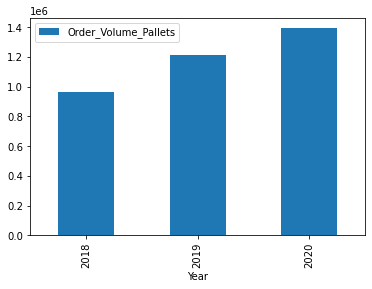

In [162]:
a.plot(x ='Year', y = 'Order_Volume_Pallets',kind = 'bar')


In [71]:
top_brand = merged_data.groupby(['Brand'],as_index = False)['Order_Volume_Pallets'].sum()
top_brand = top_brand.sort_values(by=['Order_Volume_Pallets'],ascending=False)
top_brand1 = top_brand['Brand'][:5].values.tolist()
top_brand1

['STELLA ARTOIS', 'BUDWEISER', 'LEFFE', 'LOWENBRAU', 'CORONA']

In [73]:
top_index1 = [i for i in range(len(merged_data))
            if merged_data['Brand'][i] in top_brand1]
len(top_index1)

187473

In [76]:
merged_data2 = merged_data[merged_data.index.isin(top_index1)]
len(merged_data2) 

187473

In [169]:
sum2 = merged_data2.groupby(['Brand','Year'])['Order_Volume_Pallets'].sum()
sum2

Brand             Year
BIRRA DEL BORGO   2018     36406
                  2019     45466
                  2020     51990
BRAHMA            2018     11939
                  2019     13753
                  2020     16178
BUDWEISER         2018    241887
                  2019    307456
                  2020    354517
CORONA            2018     39652
                  2019     50246
                  2020     58053
FRANZISKANER      2018     21722
                  2019     28438
                  2020     31964
GINETTE           2018     16710
                  2019     20606
                  2020     24191
LEFFE             2018    153358
                  2019    189173
                  2020    218533
LOWENBRAU         2018     72693
                  2019     92748
                  2020    105813
SPATEN            2018     21212
                  2019     28950
                  2020     31982
STELLA ARTOIS     2018    317578
                  2019    394900
                  20

In [170]:
sum3 = sum2.to_frame(name='Order_Volume_Pallets')
sum3.reset_index(drop=False, inplace=True)  # As needed                       
sum3

Brand  Year  Order_Volume_Pallets
0    BIRRA DEL BORGO  2018                 36406
1    BIRRA DEL BORGO  2019                 45466
2    BIRRA DEL BORGO  2020                 51990
3             BRAHMA  2018                 11939
4             BRAHMA  2019                 13753
5             BRAHMA  2020                 16178
6          BUDWEISER  2018                241887
7          BUDWEISER  2019                307456
8          BUDWEISER  2020                354517
9             CORONA  2018                 39652
10            CORONA  2019                 50246
11            CORONA  2020                 58053
12      FRANZISKANER  2018                 21722
13      FRANZISKANER  2019                 28438
14      FRANZISKANER  2020                 31964
15           GINETTE  2018                 16710
16           GINETTE  2019                 20606
17           GINETTE  2020                 24191
18             LEFFE  2018                153358
19             LEFFE  2019                189173
20             LEFFE  2020                218533
21         LOWENBRAU  2018                 72693
22         LOWENBRAU  2019                 92748
23         LOWENBRAU  2020                105813
24            SPATEN  2018                 21212
25            SPATEN  2019                 28950
26            SPATEN  2020                 31982
27     STELLA ARTOIS  2018                317578
28     STELLA ARTOIS  2019                394900
29     STELLA ARTOIS  2020                452113
30  TRIPEL KARMELIET  2018                 34395
31  TRIPEL KARMELIET  2019                 43245
32  TRIPEL KARMELIET  2020                 48627

<AxesSubplot:xlabel='Brand'>

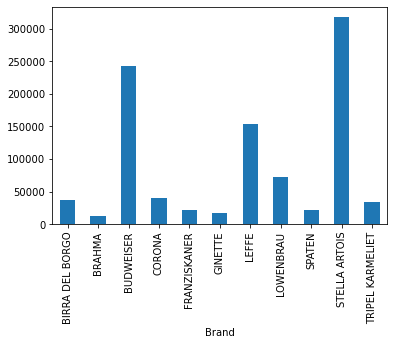

In [181]:
sum218 = sum3.loc[sum3['Year'] == 2018]
sum218 = sum218.groupby(['Brand']).sum('Order_Volume_Pallets')
#sum218
sum218['Order_Volume_Pallets'].plot.bar(stacked=True)

<AxesSubplot:xlabel='Brand'>

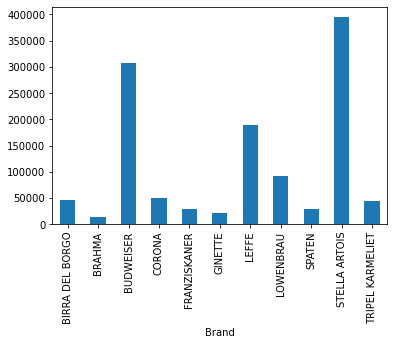

In [180]:
sum219 = sum3.loc[sum3['Year'] == 2019]
sum219 = sum219.groupby(['Brand']).sum('Order_Volume_Pallets')
#sum219
sum219['Order_Volume_Pallets'].plot.bar(stacked=True)

<AxesSubplot:xlabel='Brand'>

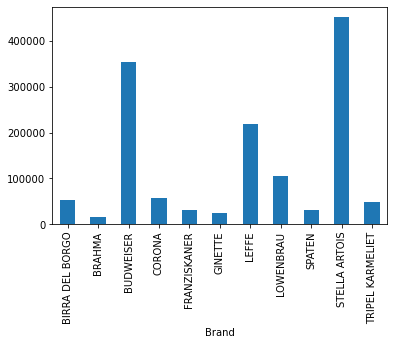

In [182]:
sum220 = sum3.loc[sum3['Year'] == 2020]
sum220 = sum220.groupby(['Brand']).sum('Order_Volume_Pallets')
#sum220
sum220['Order_Volume_Pallets'].plot.bar(stacked=True)

## Mission 4 (2pt)

The demand planning team have the notion that in the Summer Months and right before Christmas (Second half of November and first half of December), volume spikes since it is the high season.

However, as a data scientist, you will need to test these hypotheses with a data-driven approach!

Conduct two statistical significance tests:
* volume in Summer Months is higher than in other months 
* volume before christmas is higher than in other months

Use a hypothesis driven approach and give your final conclusion

In [25]:
m1 = merged_data.groupby(['Year','month'],as_index = False)['Order_Volume_Pallets'].sum()
type(m1)
m2 = m1.squeeze()


In [26]:
m2.sort_values(by=['Order_Volume_Pallets'],ascending=False)

Year      month  Order_Volume_Pallets
26  2020       July                226208
22  2020     August                225471
10  2019     August                196927
14  2019       July                196461
1   2018     August                190208
3   2018       July                188333
27  2020       June                168482
15  2019       June                148659
4   2018       June                144876
32  2020  September                134619
20  2019  September                115201
8   2018  September                110436
23  2020   December                 93980
28  2020      March                 93518
16  2019      March                 82593
11  2019   December                 81240
2   2018   December                 80281
21  2020      April                 76570
29  2020        May                 75942
30  2020  Novenmber                 75351
25  2020    January                 74823
31  2020    October                 74729
24  2020   February                 74268
19  2019    October                 66336
17  2019        May                 66310
12  2019   February                 65813
13  2019    January                 65506
9   2019      April                 65100
18  2019  Novenmber                 64835
7   2018    October                 64744
6   2018  Novenmber                 63517
5   2018        May                 62822
0   2018      April                 62335

In [27]:
m18 = m2.loc[m2['Year'] == 2018]
m19 = m2.loc[m2['Year'] == 2019]
m20 = m2.loc[m2['Year'] == 2020]


Every year volume in Summer Months is higher than in other months, but volume in Christmas is not higher than in other months.

<AxesSubplot:xlabel='month'>

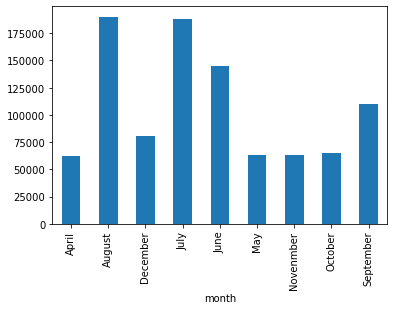

In [28]:
m18 = m18.groupby(['month']).sum('Order_Volume_Pallets')
m18['Order_Volume_Pallets'].plot.bar(stacked=True)





<AxesSubplot:xlabel='month'>

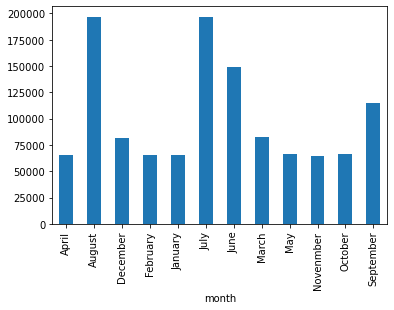

In [29]:
m19 = m19.groupby(['month']).sum('Order_Volume_Pallets')
m19['Order_Volume_Pallets'].plot.bar(stacked=True)

<AxesSubplot:xlabel='month'>

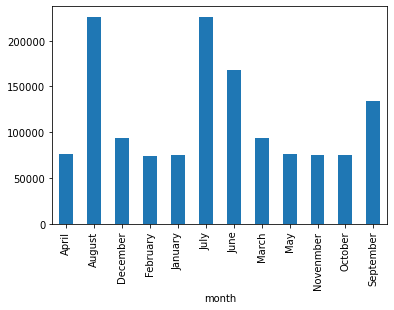

In [30]:
m20 = m20.groupby(['month']).sum('Order_Volume_Pallets')
m20['Order_Volume_Pallets'].plot.bar(stacked=True)

## Mission 5 (1pt)

The demand planning team is very happy with your Analysis and has asked the Analytics team for help!

They are struggling to build a forecast to accurately predict how many cases of beer each customer will order.

For logistics purposes, they need you to predict by country, customer, SKU and a given week, since the forecast will be used to plan production and distribution.

You will build the model with your Senior Data Scientist, who has asked you to prepare a couple of points before meeting him tomorrow:

* What will be the target variable for the model?
* What type of model should be used?
* What features would you investigate to help predict the target variable? (Note: your Senior Data Scientist has already thought of past ordering behavior, so do not include this one in your list)

To answer these questions, your Senior Data Scientist has asked you to be as specific as possible.

In [193]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow
from sklearn import linear_model

In [184]:
from statsmodels.formula.api import ols
from scipy import stats 
import statsmodels.api as sm

In [185]:
merged_data1 = merged_data.iloc[:,:].values

In [223]:
merged_data.isnull().sum().sort_values(ascending=False)/merged_data2.shape[0]
#proportion of missing values in the dataset-we dont have

Container Size (L)      0.013333
Unnamed: 0_x            0.000000
Week_Number             0.000000
Year                    0.000000
SKU                     0.000000
Country                 0.000000
Customer_Name           0.000000
Order_Volume_Pallets    0.000000
Unnamed: 0_y            0.000000
Brand                   0.000000
Container Type          0.000000
dtype: float64

# CATEGORICAL TO NUMERIC

In [186]:
Country = LabelEncoder()
merged_data1[:,4] = Country.fit_transform(merged_data1[:,4])
merged_data1[:,4]

array([5, 5, 5, ..., 4, 4, 4], dtype=object)

In [187]:
Customer_Name = LabelEncoder()
merged_data1[:,5] = Customer_Name.fit_transform(merged_data1[:,5])
merged_data1[:,5]

array([15, 1, 12, ..., 7, 0, 1], dtype=object)

In [210]:
merged_data2 = pd.DataFrame(merged_data1, columns = ['Unnamed','Week_Number','Year','SKU','Country','Customer_Name','Order_Volume_Pallets','Unnamedy','Brand','Container Type','Container Size'] )

merged_data2


Unnamed Week_Number  Year        SKU Country Customer_Name  \
0            0          14  2018  999003585       5            15   
1            1          14  2018  999003585       5             1   
2            2          14  2018  999003585       5            12   
3            3          14  2018  999003585       5            16   
4            4          14  2018  999003585       5            14   
...        ...         ...   ...        ...     ...           ...   
246670  246670          52  2020      43521       0             7   
246671  246671          52  2020      43521       0             0   
246672  246672          52  2020      43521       4             7   
246673  246673          52  2020      43521       4             0   
246674  246674          52  2020      43521       4             1   

       Order_Volume_Pallets Unnamedy      Brand Container Type Container Size  
0                        36   113693  LOWENBRAU            Can           0.33  
1                         2   113693  LOWENBRAU            Can           0.33  
2                        24   113693  LOWENBRAU            Can           0.33  
3                         0   113693  LOWENBRAU            Can           0.33  
4                         0   113693  LOWENBRAU            Can           0.33  
...                     ...      ...        ...            ...            ...  
246670                   19    22937     SPATEN            Can            0.5  
246671                   14    22937     SPATEN            Can            0.5  
246672                    5    22937     SPATEN            Can            0.5  
246673                    7    22937     SPATEN            Can            0.5  
246674                    2    22937     SPATEN            Can            0.5  

[246675 rows x 11 columns]

In [211]:
Y = merged_data2.Order_Volume_Pallets
X = merged_data2.drop(['Unnamed','Year','Order_Volume_Pallets','Unnamedy','Brand','Container Type','Container Size'],axis=1)
X

Week_Number        SKU Country Customer_Name
0               14  999003585       5            15
1               14  999003585       5             1
2               14  999003585       5            12
3               14  999003585       5            16
4               14  999003585       5            14
...            ...        ...     ...           ...
246670          52      43521       0             7
246671          52      43521       0             0
246672          52      43521       4             7
246673          52      43521       4             0
246674          52      43521       4             1

[246675 rows x 4 columns]

In [212]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [213]:
model = linear_model.LinearRegression()


In [214]:
model.fit(X_train,Y_train)

LinearRegression()

In [227]:
Y_pred = model.predict(X_test)
Y_pred

array([ 7.31224738, 13.42584191, 14.30905922, ...,  9.10672865,
        8.55975145,  9.57682391])

In [216]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 2.87965519e-02 -4.05961517e-09  3.93164518e-01  9.69558505e-01]
Intercept: 6.419716214875516
Mean squared error (MSE): 493.95
Coefficient of determination (R^2): 0.05


In [228]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
yhat = dt.predict(X_test)
yhat


array([ 3., 12., 32., ...,  5.,  9.,  3.])

In [229]:
r2_score(Y_test, yhat), mean_absolute_error(Y_test, yhat), np.sqrt(mean_squared_error(Y_test, yhat))


(0.20071545449277517, 11.075774467078816, 20.403092014587617)

# Mission 6 (3pt)

#### One idea your Senior Data Scientist wants you to analyze is if we can build good features for the model using past ordering behavior

Your Senior Data Scientist has asked you to analyze:

* Is the average volume in the past 4 weeks or past 3 months highly correlated to the target variable?
* Is the average volume in the same month of the past year highly correlated to the target variable?

To answer these questions, you will have to generate lagged variables and check the correlation to the target variable.

He has also asked you to come up with one other feature and test its correlation to the target variable.

In [85]:
l1 = merged_data.groupby(['Year','month'])['Order_Volume_Pallets'].sum()
l1

Year  month    
2018  April         62335
      August       190208
      December      80281
      July         188333
      June         144876
      May           62822
      Novenmber     63517
      October       64744
      September    110436
2019  April         65100
      August       196927
      December      81240
      February      65813
      January       65506
      July         196461
      June         148659
      March         82593
      May           66310
      Novenmber     64835
      October       66336
      September    115201
2020  April         76570
      August       225471
      December      93980
      February      74268
      January       74823
      July         226208
      June         168482
      March         93518
      May           75942
      Novenmber     75351
      October       74729
      September    134619
Name: Order_Volume_Pallets, dtype: int64

In [86]:
l2 = l1.to_frame(name='Order_Volume_Pallets')
l2.reset_index(drop=False, inplace=False)  # As needed                       
l2

Order_Volume_Pallets
Year month                          
2018 April                     62335
     August                   190208
     December                  80281
     July                     188333
     June                     144876
     May                       62822
     Novenmber                 63517
     October                   64744
     September                110436
2019 April                     65100
     August                   196927
     December                  81240
     February                  65813
     January                   65506
     July                     196461
     June                     148659
     March                     82593
     May                       66310
     Novenmber                 64835
     October                   66336
     September                115201
2020 April                     76570
     August                   225471
     December                  93980
     February                  74268
     January                   74823
     July                     226208
     June                     168482
     March                     93518
     May                       75942
     Novenmber                 75351
     October                   74729
     September                134619

In [89]:
l2['Previous Year Volume'] = l2['Order_Volume_Pallets'].shift(9)
l2
#average volume in the same month of the past year-lagged variable

Order_Volume_Pallets  Previous Year Volume
Year month                                                
2018 April                     62335                   NaN
     August                   190208                   NaN
     December                  80281                   NaN
     July                     188333                   NaN
     June                     144876                   NaN
     May                       62822                   NaN
     Novenmber                 63517                   NaN
     October                   64744                   NaN
     September                110436                   NaN
2019 April                     65100               62335.0
     August                   196927              190208.0
     December                  81240               80281.0
     February                  65813              188333.0
     January                   65506              144876.0
     July                     196461               62822.0
     June                     148659               63517.0
     March                     82593               64744.0
     May                       66310              110436.0
     Novenmber                 64835               65100.0
     October                   66336              196927.0
     September                115201               81240.0
2020 April                     76570               65813.0
     August                   225471               65506.0
     December                  93980              196461.0
     February                  74268              148659.0
     January                   74823               82593.0
     July                     226208               66310.0
     June                     168482               64835.0
     March                     93518               66336.0
     May                       75942              115201.0
     Novenmber                 75351               76570.0
     October                   74729              225471.0
     September                134619               93980.0